In [1]:
# Application initialization
import mercury as mr

import warnings
warnings.filterwarnings('ignore')

show_code = mr.Checkbox(value=False, label="Show code", url_key="show_code")

app = mr.App(
    title="cGAN Forecasts Visualization",
    description="Visualizing cGAN Forecasts",
    show_code=show_code.value,
)

mercury.Checkbox

mercury.App

In [2]:
from os import getenv
from datetime import datetime
from cgan_ui.utils import get_forecast_data_dates

# from cgan_ui.utils import  print_forecast_info

mask_region = getenv("DEFAULT_MASK", "East Africa")

data_dates = get_forecast_data_dates(source="cgan", mask_region=mask_region)

cgan_date = mr.Select(
    choices=data_dates,
    value=data_dates[0],
    label="Forecast Initialization Date",
    url_key="cgan_date",
)

# print_forecast_info(datetime.strptime(cgan_date.value.lower(), "%b %d, %Y"))

mercury.Select

In [3]:
from cgan_ui.utils import get_data_store_path
from cgan_ui.show_cgan import load_GAN_forecast

store_path = get_data_store_path(source="cgan", mask_region=mask_region)

# Load the GAN forecast
data = load_GAN_forecast(
    forecast_init_date=datetime.strptime(cgan_date.value.lower(), "%b %d, %Y"),
    data_dir=store_path,
    mask_region=mask_region,
)

In [4]:
from cgan_ui.constants import TP_PLOT_UNITS

plot_units = mr.Select(
    value=TP_PLOT_UNITS[0], choices=TP_PLOT_UNITS, label="Accumulation Units", url_key="vis_param"
)

mercury.Select

In [5]:
from cgan_ui.constants import COUNTRY_NAMES

mask_area = mr.Select(
    choices=COUNTRY_NAMES,
    value=COUNTRY_NAMES[0],
    label="Area of Interest",
    url_key="mask_area",
)

mercury.Select

In [6]:
from cgan_ui.constants import COLOR_SCHEMES

color_style = mr.Select(
    choices=COLOR_SCHEMES,
    value=COLOR_SCHEMES[0],
    label="Visualization Color Style",
    url_key="color_style",
)

mercury.Select

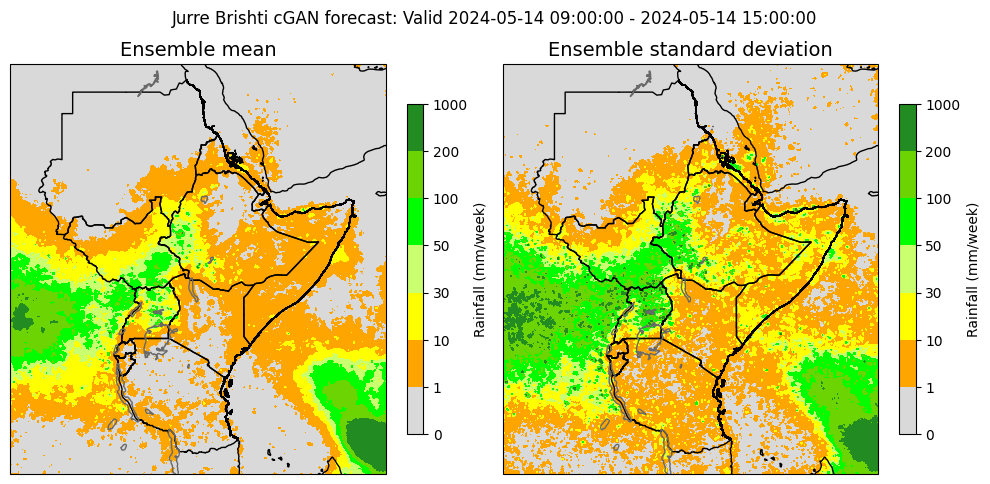

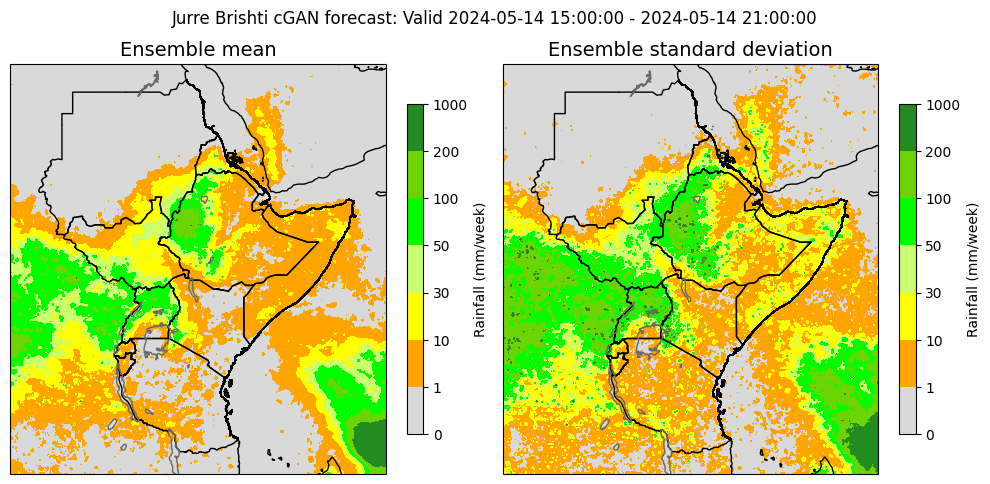

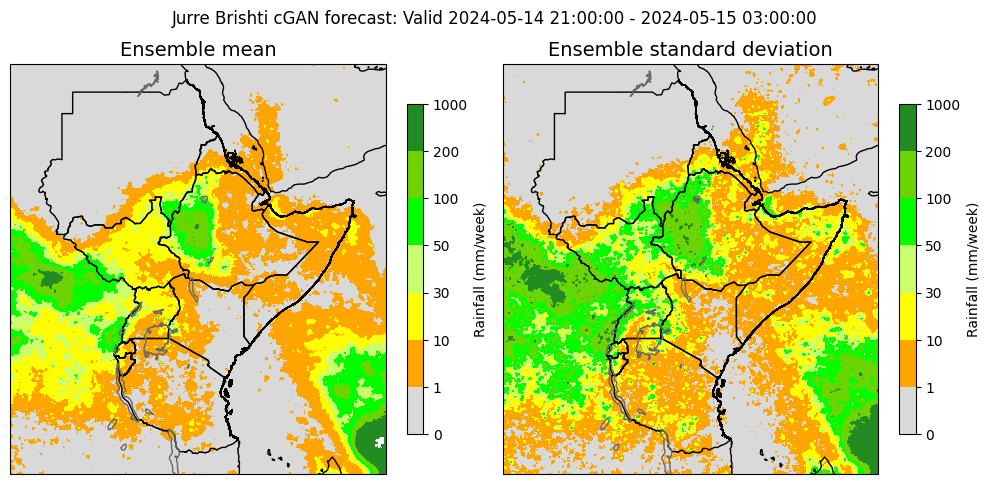

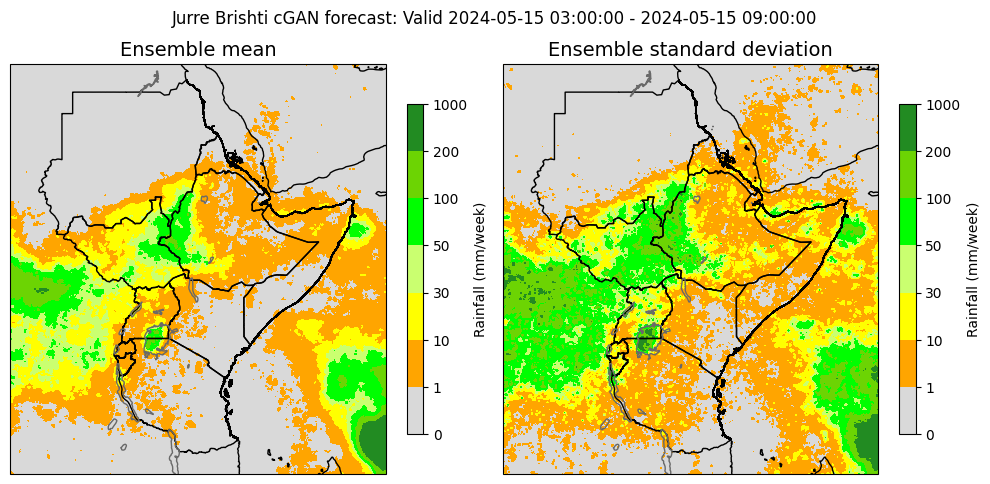

In [7]:
from cgan_ui.show_cgan import plot_GAN_forecast

# Plot the GAN forecast
plot_GAN_forecast(
    data,
    style=None if color_style.value == "Default" else color_style.value,
    region=mask_area.value,
    plot_units=plot_units.value,
)

In [8]:
from cgan_ui.show_cgan import plot_GAN_ensemble

show_ensemble = mr.Checkbox(
    value=False,
    label="Visualize Ensemble Members",
    url_key="show_ensemble",
)

if show_ensemble.value:
    # Plot the full ensemble
    plot_GAN_ensemble(
        data,
        valid_time_start_hour=12,
        style=None if color_style.value == "Default" else color_style.value,
        plot_units=plot_units.value,
        region=mask_area.value,
    )

mercury.Checkbox